In [2]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#### User needs to modify this line to correspond to their local data, 
#### which can be downloaded from Hydroshare:
#### http://www.hydroshare.org/resource/dbf8e4c2a39a4c228db867b04f9c21ed
LOC_DATA_DIR = "../2023_nwm_cnn_california/"

STATS_DIR = f"{LOC_DATA_DIR}images_for_sacramento_stats/"

In [8]:

def plot_dual_layer(data1_file, data2_file, title):
    with rasterio.open(data1_file) as src1:
        data1 = src1.read(1).astype(float)
#        data1[data1 == src1.nodata] = np.nan  # handle no data values
        data1[data1 <= 1] = np.nan

    with rasterio.open(data2_file) as src2:
        data2 = src2.read(1).astype(float)
#        data2[data2 == src2.nodata] = np.nan  # handle no data values
        data2[data2 <= 1] = np.nan

    # Create custom colormaps
    cmap1 = mcolors.LinearSegmentedColormap.from_list("Layer1", ["blue", "green"])
    cmap2 = mcolors.LinearSegmentedColormap.from_list("Layer2", ["none", "red", "yellow"])  # 'none' for transparency at low values

    cmap2.set_under('none')  # Set under-color for transparency
    cmap2.set_bad('none')  # Set bad-data (nan values) color for transparency

    fig, ax = plt.subplots(figsize=(8, 6))

    # Normalize the datasets
    norm1 = mcolors.Normalize(vmin=np.nanmin(data1), vmax=np.nanmax(data1))
    norm2 = mcolors.Normalize(vmin=np.nanmin(data2), vmax=np.nanmax(data2))

    # Plot the first layer
    ax.imshow(data1, cmap=cmap1, norm=norm1, extent=rasterio.plot.plotting_extent(src1))

    # Plot the second layer with some transparency
    ax.imshow(data2, cmap=cmap2, norm=norm2, extent=rasterio.plot.plotting_extent(src2), alpha=0.5)

    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.colorbar(ax.imshow(data1, cmap=cmap1, norm=norm1, extent=rasterio.plot.plotting_extent(src1)), ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='Layer 1 Scale')
    plt.colorbar(ax.imshow(data2, cmap=cmap2, norm=norm2, extent=rasterio.plot.plotting_extent(src2), alpha=0.5), ax=ax, orientation='vertical', fraction=0.046, pad=0.04, label='Layer 2 Scale')

    plt.show()

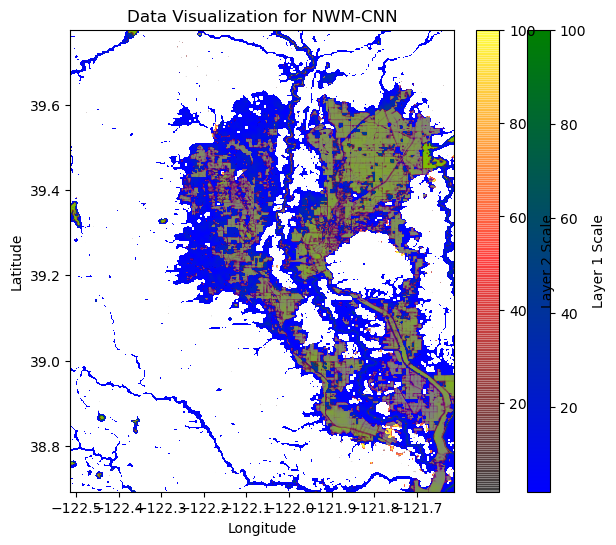

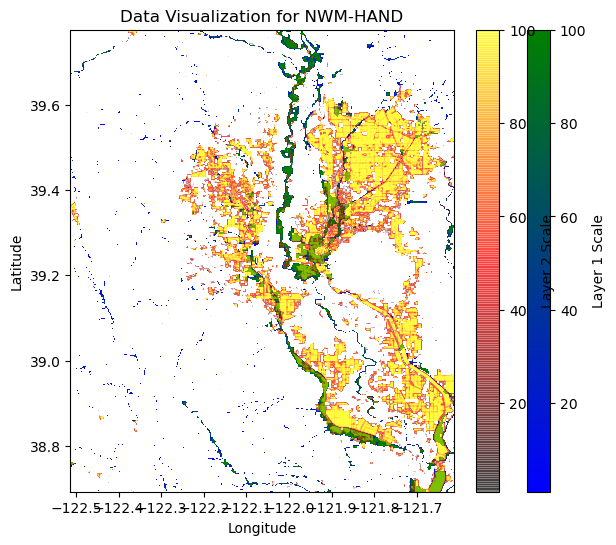

In [9]:

data1_cnn_path = f"{STATS_DIR}NWM-CNN_20230106_20230114.tif"
data1_hand_path = f"{STATS_DIR}NWM-HAND.tif"
data2_path = f"{STATS_DIR}CA_S1.tif"

plot_dual_layer(data1_cnn_path, data2_path, "Data Visualization for NWM-CNN")
plot_dual_layer(data1_hand_path, data2_path, "Data Visualization for NWM-HAND")
